In [1]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_14425/354842055.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


          x1        x2  y
0   4.672338  4.768932  0
1   4.399361  8.119413  1
2   5.931280  5.437637  0
3   4.398293  7.458540  1
4   4.780328  4.095963  0
5   5.314247  8.252502  1
6   6.031000  5.104471  0
7   5.087047  4.555732  0
8   4.536582  7.408099  1
9   5.542560  8.850014  1
10  5.647689  8.816296  1
11  5.328751  4.759257  0
12  4.539361  7.682773  1
13  5.005113  4.480296  0
14  4.191506  4.023440  0
15  6.477894  5.962883  0
16  3.849006  7.298090  1
17  4.354880  4.349911  0
18  4.498243  3.863170  0
19  4.323078  4.298164  0


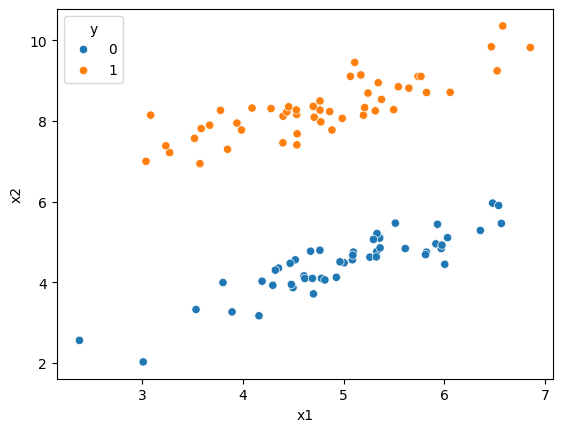

In [2]:
import pandas as pd
import seaborn as sns

np.random.seed(42)

def sep_line(x):
    return 0.7*x + 3

x1 = np.random.normal(loc= 5, scale= 1, size= 100)
x2 = [sep_line(x1[i]) + np.random.normal(loc= 2, scale= 0.4, size= 1)[0] for i in range(50)]
x3 = [sep_line(x1[i]) - np.random.normal(loc= 2, scale= 0.4, size= 1)[0] for i in range(50, 100)]
x2 = x2+x3
y = [1 for i in range(50)] + [0 for i in range(50)]

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data = data.sample(frac=1).reset_index(drop=True)

sns.scatterplot(x='x1', y='x2', hue='y', data=data)
print(data.head(20))



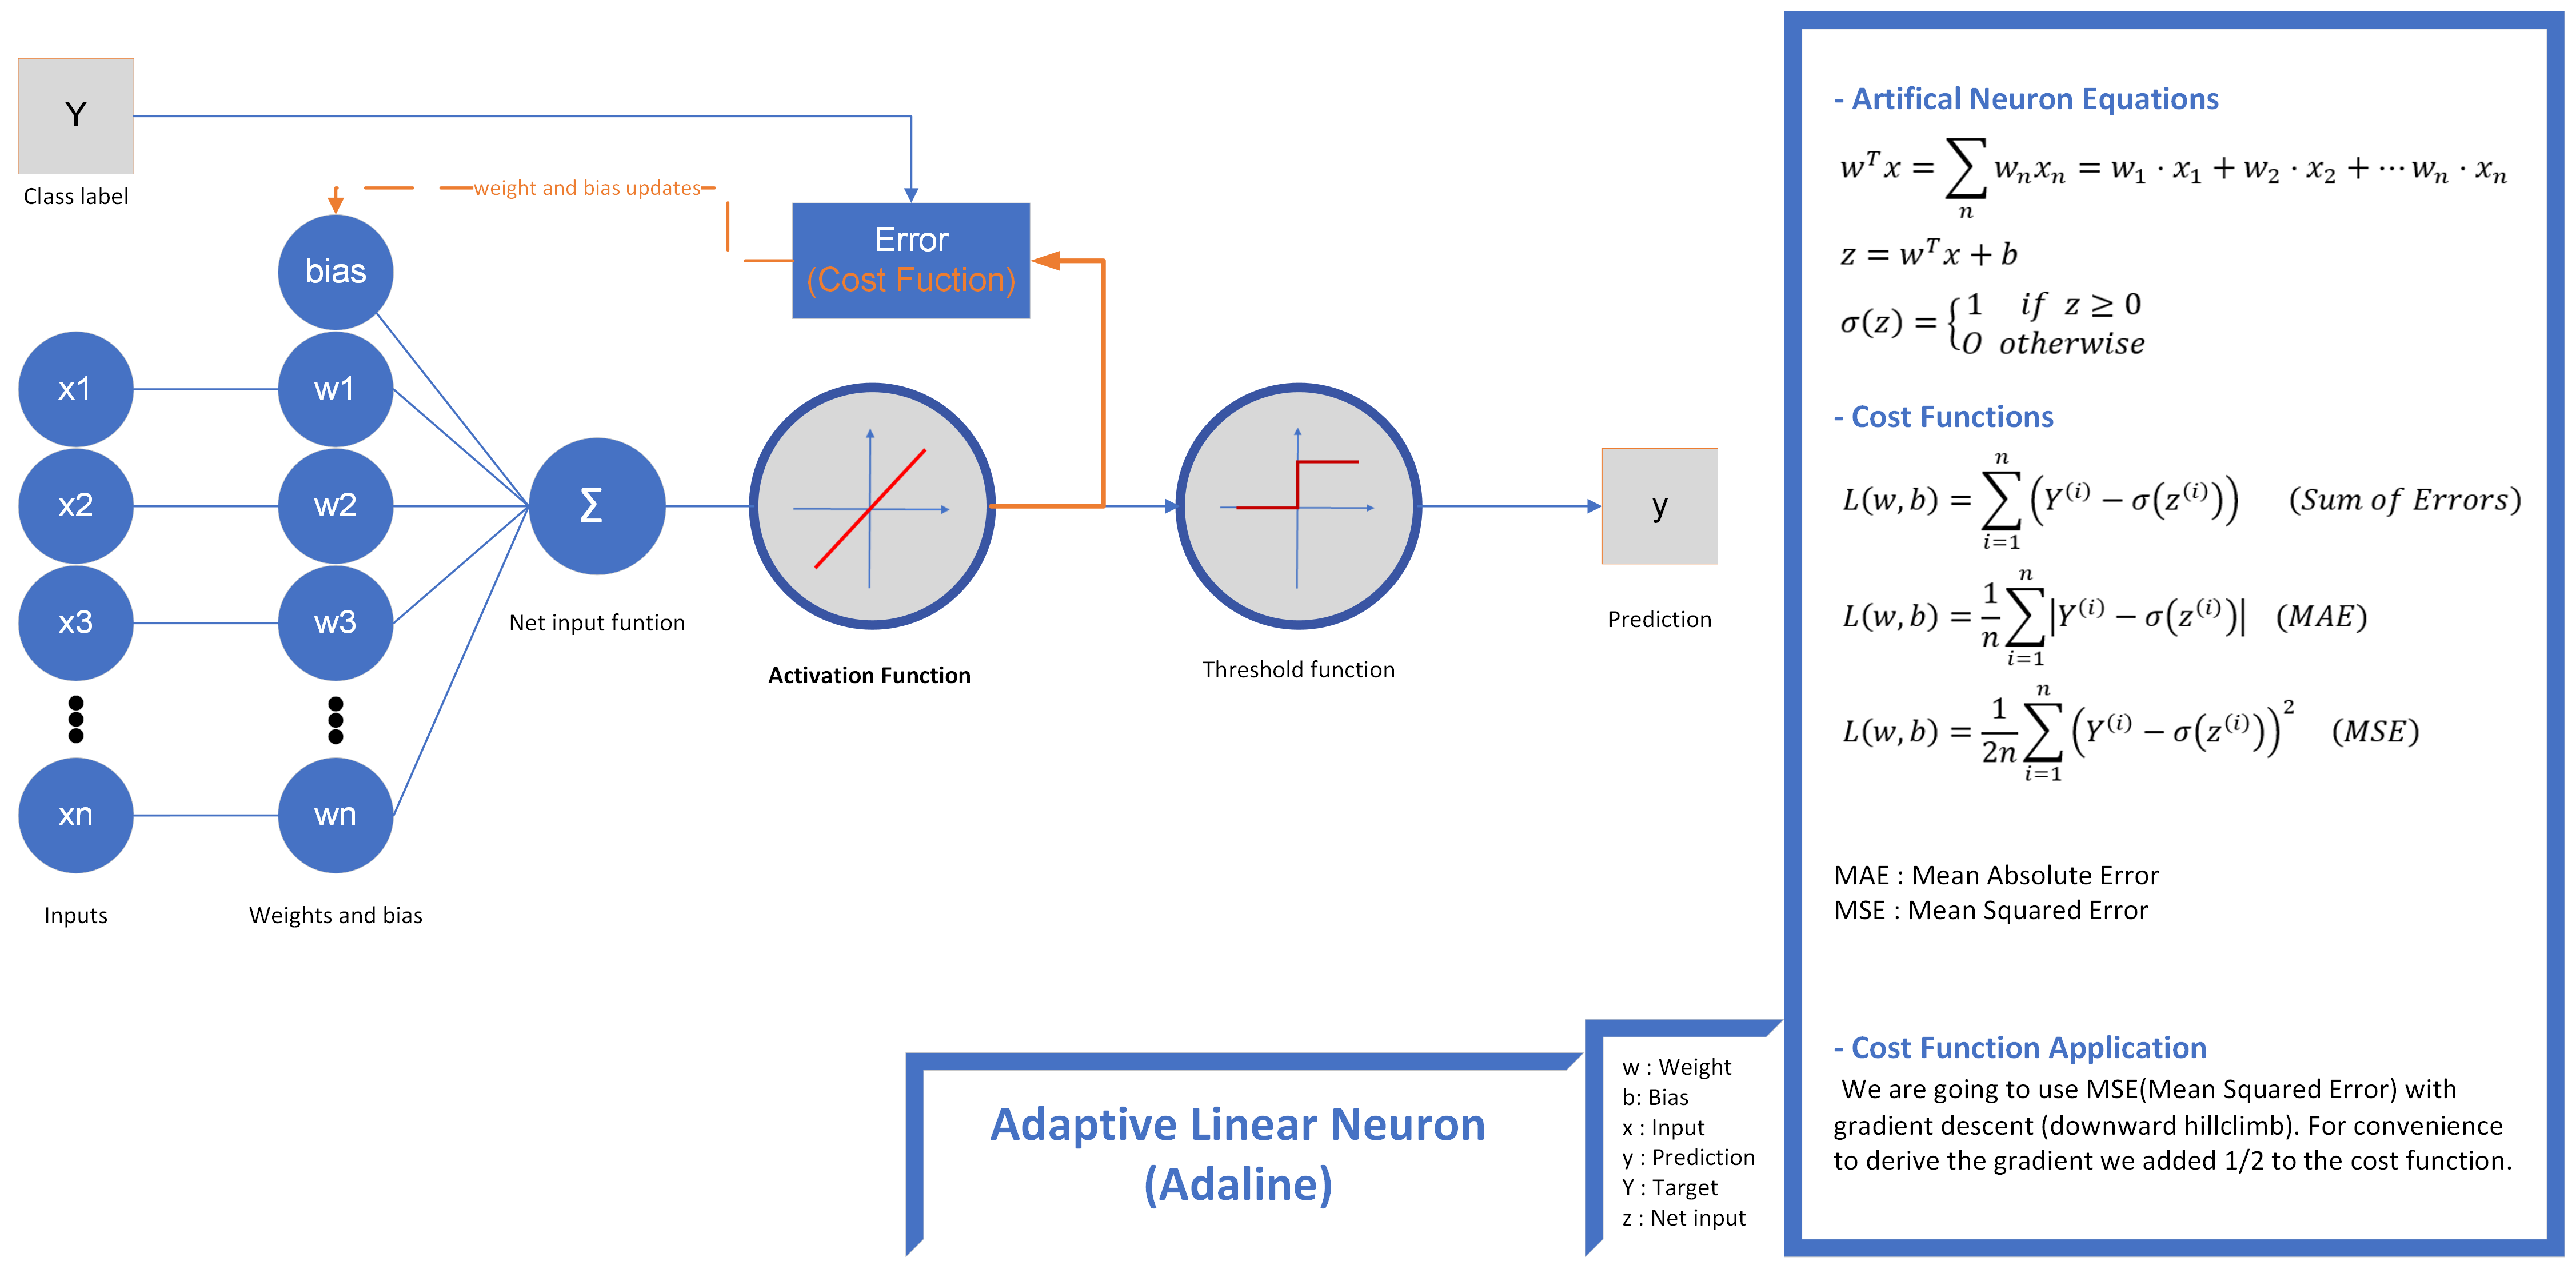

In [3]:
from IPython.display import Image
Image("images/adaline-diagram.png", width=800, height=700)

In [4]:
class Adaline:
    def __init__(self, lr=0.01, n_iter=50, random_state=42):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.weight_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.bias_ = float(0.01)
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)

            self.weight_ += self.lr * 2.0 * X.T.dot(errors) / X.shape[0]
            self.bias_ += self.lr * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.loss_.append(loss)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.weight_) + self.bias_
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


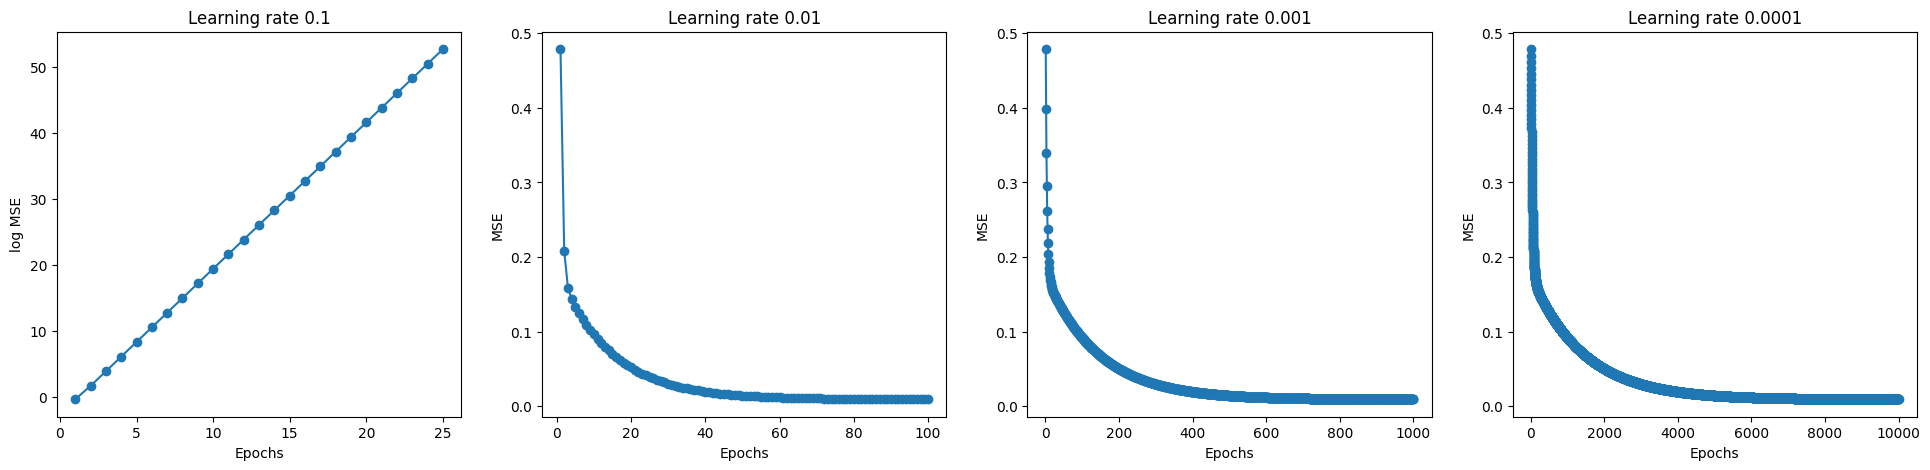

In [5]:
y = data['y'].values
X = data[['x1', 'x2']].values


l_rates = [0.01, 0.001, 0.0001]
iters = [ 100, 1000, 10000]

fig , ax = plt.subplots(ncols=4, figsize=(24,5))
i=1
adal = Adaline(lr=0.1, n_iter=25)
adal.fit(X,y)
ax[0].plot(range(1, len(adal.loss_) + 1), np.log10(adal.loss_), marker='o') # with this learning rate, the loss is more than e50, so we take log 
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log MSE')
ax[0].set_title('Learning rate {}'.format(0.1))
for rate,iter in zip(l_rates,iters):
    adal = Adaline(lr=rate, n_iter=iter)
    adal.fit(X,y)
    ax[i].plot(range(1, len(adal.loss_) + 1), adal.loss_, marker='o')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('MSE')
    ax[i].set_title('Learning rate {}'.format(rate))
    i+=1


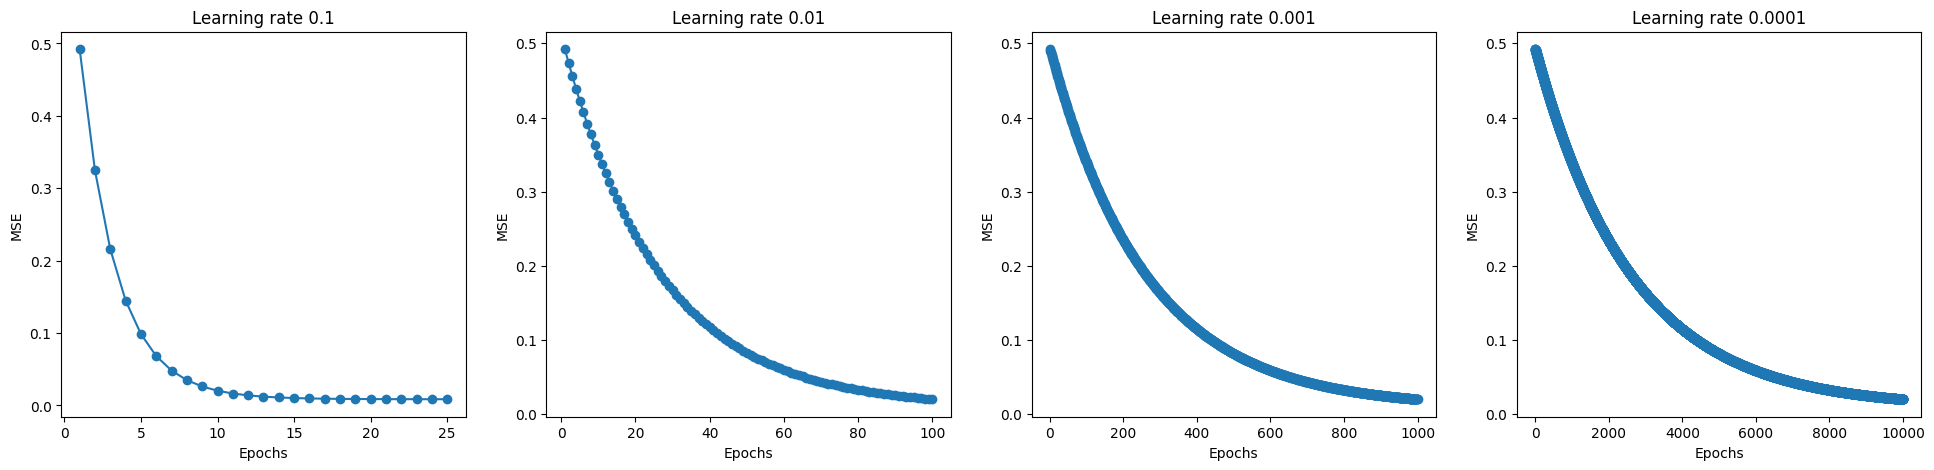

In [6]:
from sklearn.preprocessing import StandardScaler
y = data['y'].values
X = data[['x1', 'x2']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

l_rates = [0.01, 0.001, 0.0001]
iters = [ 100, 1000, 10000]

fig , ax = plt.subplots(ncols=4, figsize=(24,5))
i=1
adal = Adaline(lr=0.1, n_iter=25)
adal.fit(X,y)
ax[0].plot(range(1, len(adal.loss_) + 1), adal.loss_, marker='o') # after scaling, the loss is small, so we don't need to take log
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('MSE')
ax[0].set_title('Learning rate {}'.format(0.1))
for rate,iter in zip(l_rates,iters):
    adal = Adaline(lr=rate, n_iter=iter)
    adal.fit(X,y)
    ax[i].plot(range(1, len(adal.loss_) + 1), adal.loss_, marker='o')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('MSE')
    ax[i].set_title('Learning rate {}'.format(rate))
    i+=1

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None):
    markers = ('o', 's')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    if ax is None:
        plt.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
    else:
        ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
        ax.set_xlim(xx1.min(), xx1.max())
        ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        if ax is None:
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        c=colors[idx],
                        marker=markers[idx], 
                        edgecolor='black')
        else:
            ax.scatter(x=X[y == cl, 0], 
                       y=X[y == cl, 1], 
                       c=colors[idx],
                       marker=markers[idx], 
                       edgecolor='black')

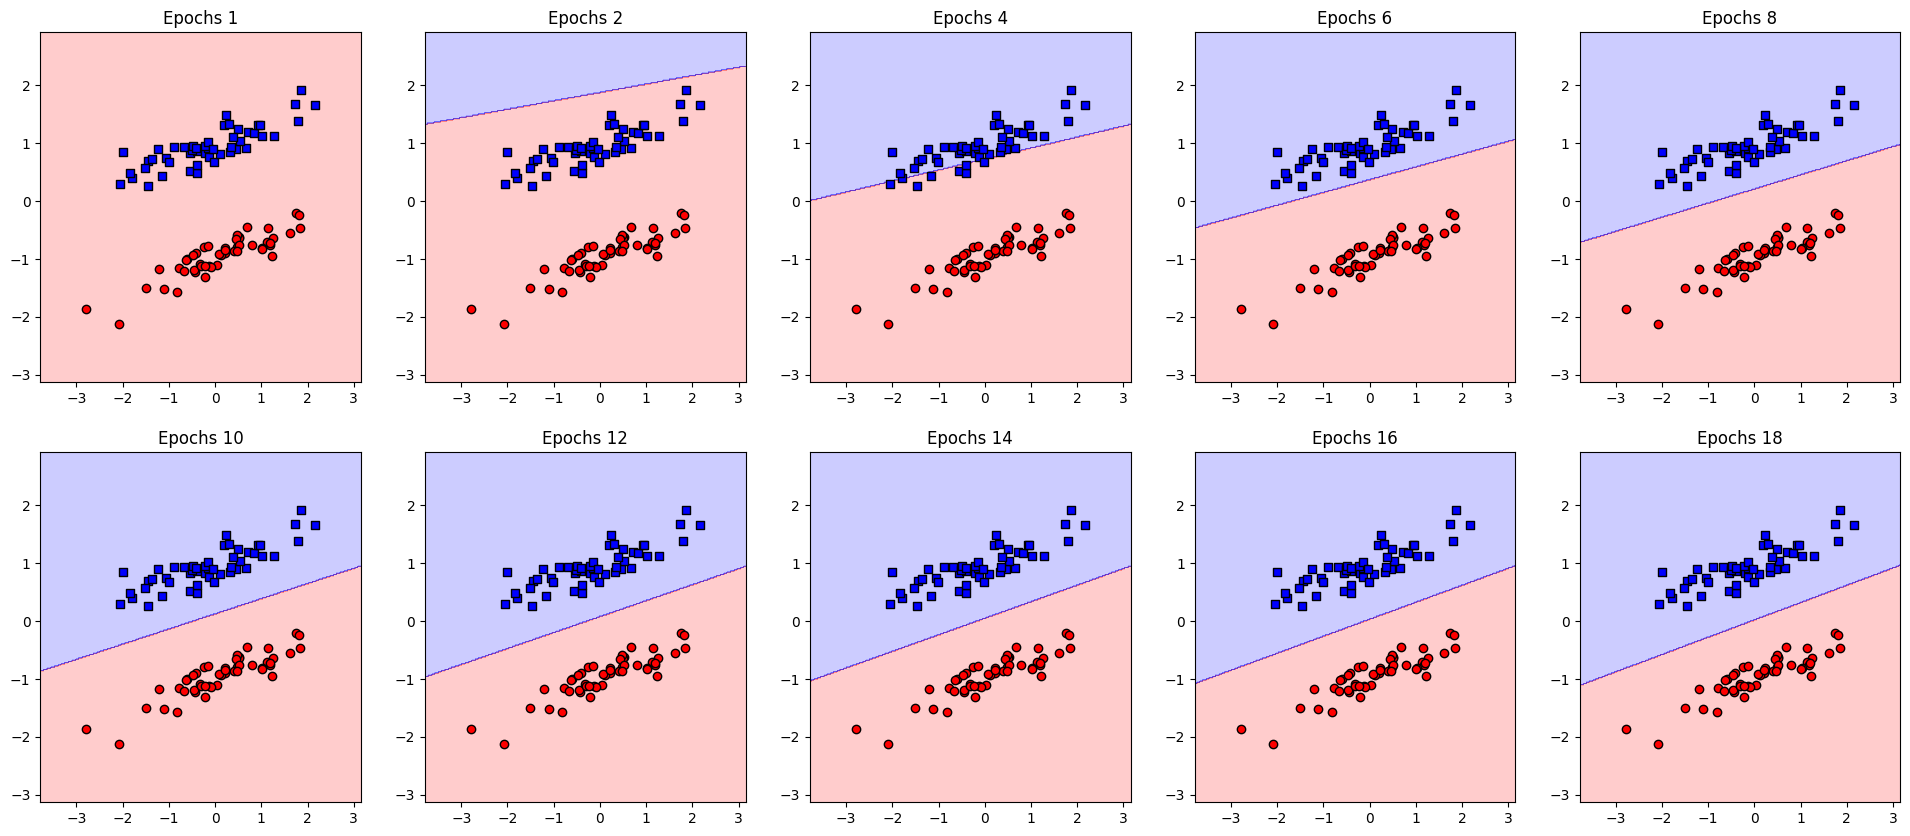

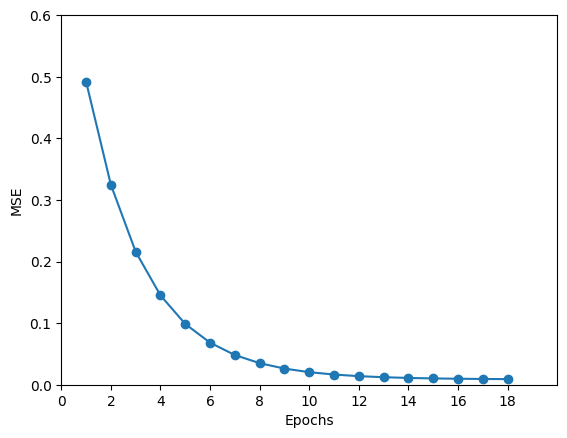

In [8]:
epochs = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]

fig , ax = plt.subplots(ncols=5, nrows=2, figsize=(24,10))
i=0
for epoch in epochs:
    adal = Adaline(lr=0.1, n_iter=epoch)
    adal.fit(X,y)
    plot_decision_regions(X, y, classifier=adal, ax=ax[i//5][i%5])
    ax[i//5][i%5].set_title('Epochs {}'.format(epoch))
    i+=1
plt.show()

plt.plot(range(1, len(adal.loss_) + 1), adal.loss_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.xlim(0, 20)
plt.ylim(0, 0.6)
plt.xticks(ticks=range(0, len(adal.loss_) + 2, 2))
plt.show()



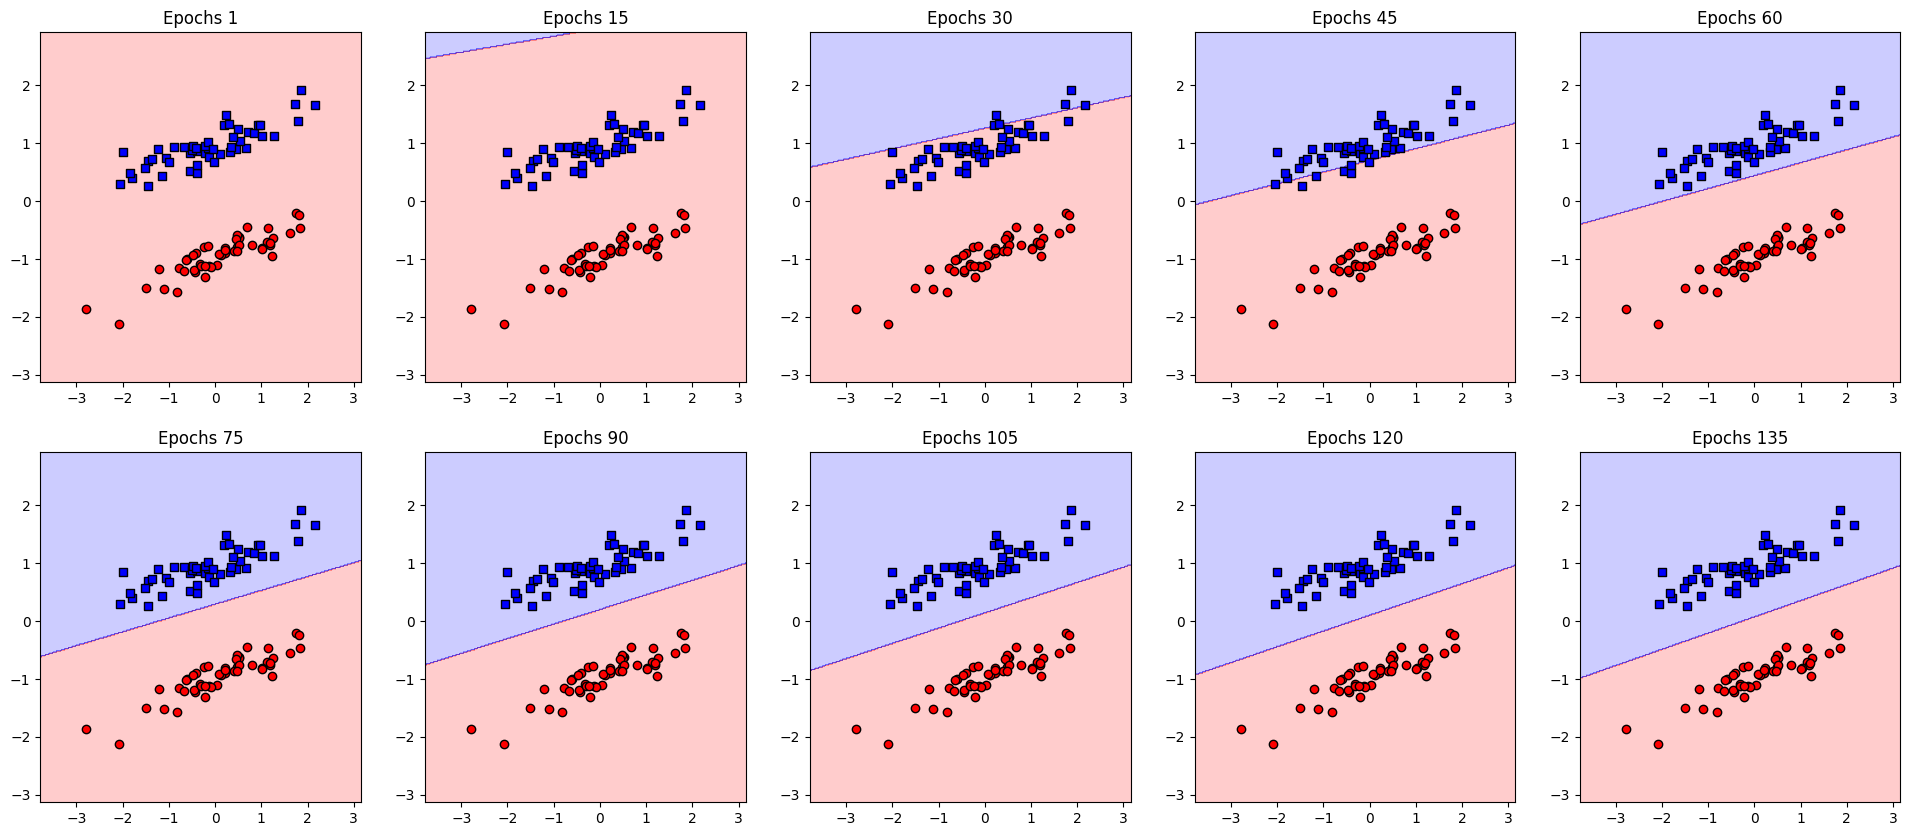

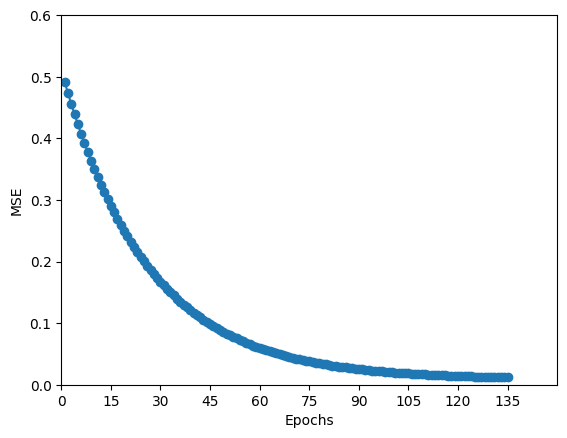

In [9]:
epochs = [1, 15, 30, 45, 60, 75, 90, 105, 120, 135]

fig , ax = plt.subplots(ncols=5, nrows=2, figsize=(24,10))
i=0
for epoch in epochs:
    adal = Adaline(lr=0.01, n_iter=epoch)
    adal.fit(X,y)
    plot_decision_regions(X, y, classifier=adal, ax=ax[i//5][i%5])
    ax[i//5][i%5].set_title('Epochs {}'.format(epoch))
    i+=1

plt.show()
plt.plot(range(1, len(adal.loss_) + 1), adal.loss_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.xlim(0, 150)
plt.ylim(0, 0.6)
plt.xticks(ticks=range(0, len(adal.loss_) + 15, 15))
plt.show()


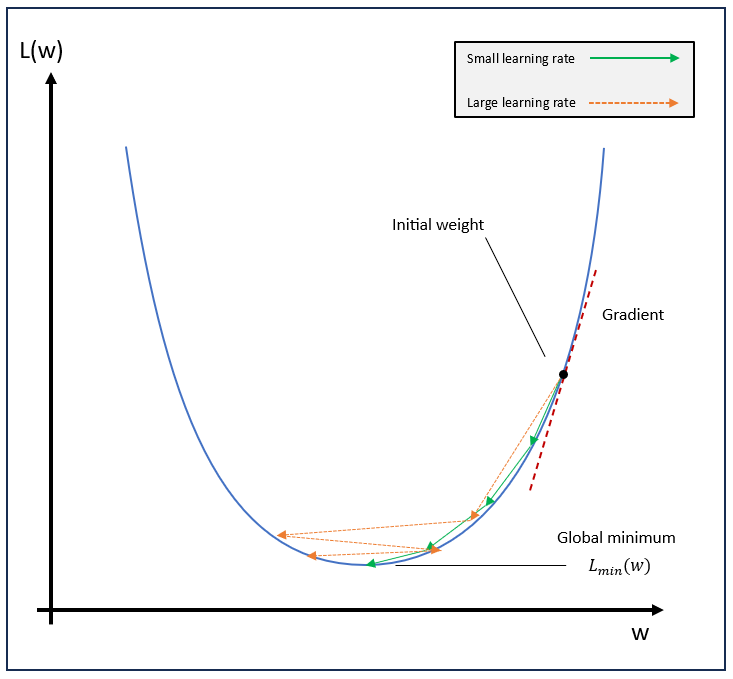

In [10]:
Image("images/adaline-gd-graph.png", width=800, height=700)

          x1         x2  y
0   5.496714   7.856940  1
1   4.861736   8.108763  1
2   5.647689   8.713482  1
3   6.523030   9.004527  1
4   4.765847   8.223193  1
5   4.765863   8.618940  1
6   6.579213  10.925779  1
7   5.767435   9.159409  1
8   4.530526   8.351653  1
9   5.542560   8.827680  1
10  4.536582   6.832468  1
11  4.534270   8.155429  1
12  5.241962   8.711535  1
13  3.086720   8.884973  1
14  3.275082   7.157905  1
15  4.437712   8.317482  1
16  3.987169   7.766720  1
17  5.314247   7.901899  1
18  4.091976   8.664359  1
19  3.587696   8.037741  1


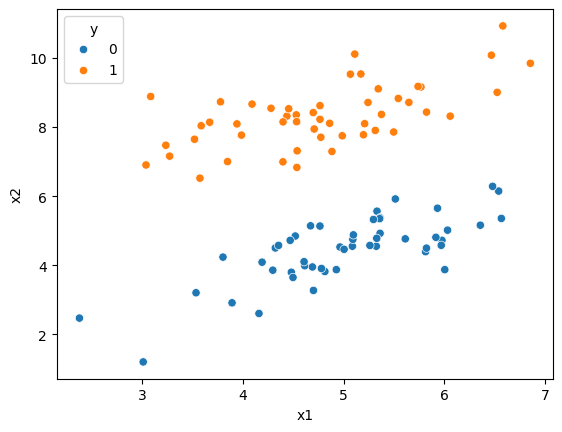

In [38]:
np.random.seed(42)

def sep_line(x):
    return 0.7*x + 3

x1 = np.random.normal(loc= 5, scale= 1, size= 100)
x2 = [sep_line(x1[i]) + np.random.normal(loc= 2, scale= 0.7, size= 1)[0] for i in range(50)]
x3 = [sep_line(x1[i]) - np.random.normal(loc= 2, scale= 0.7, size= 1)[0] for i in range(50, 100)]
x2 = x2+x3
y = [1 for i in range(50)] + [0 for i in range(50)]

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
#data = data.sample(frac=1).reset_index(drop=True)

sns.scatterplot(x='x1', y='x2', hue='y', data=data)
print(data.head(20))

In [17]:
y = data['y'].values
X = data[['x1', 'x2']].values

In [42]:
class AdalineGD:
    def __init__(self, lr=0.01, n_iter=50, shuffle=True, random_state=None):
        self.lr = lr
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self,X,y):
        X= np.array(X)
        y= np.array(y)
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            loss = []
            for xi, target in zip(X,y):
                loss.append(self._update_weights(xi, target))
            avg_loss = sum(loss) / len(y)
            self.losses_.append(avg_loss)
        return self
    
    def partial_derivative_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        r = r.astype(int)
        return X[r], y[r]

    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.weight_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.bias_ = float(0.01)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.weight_ += self.lr * 2.0 * xi.dot(error)
        self.bias_ += self.lr * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self,X):
        return np.dot(X,self.weight_) + self.bias_
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

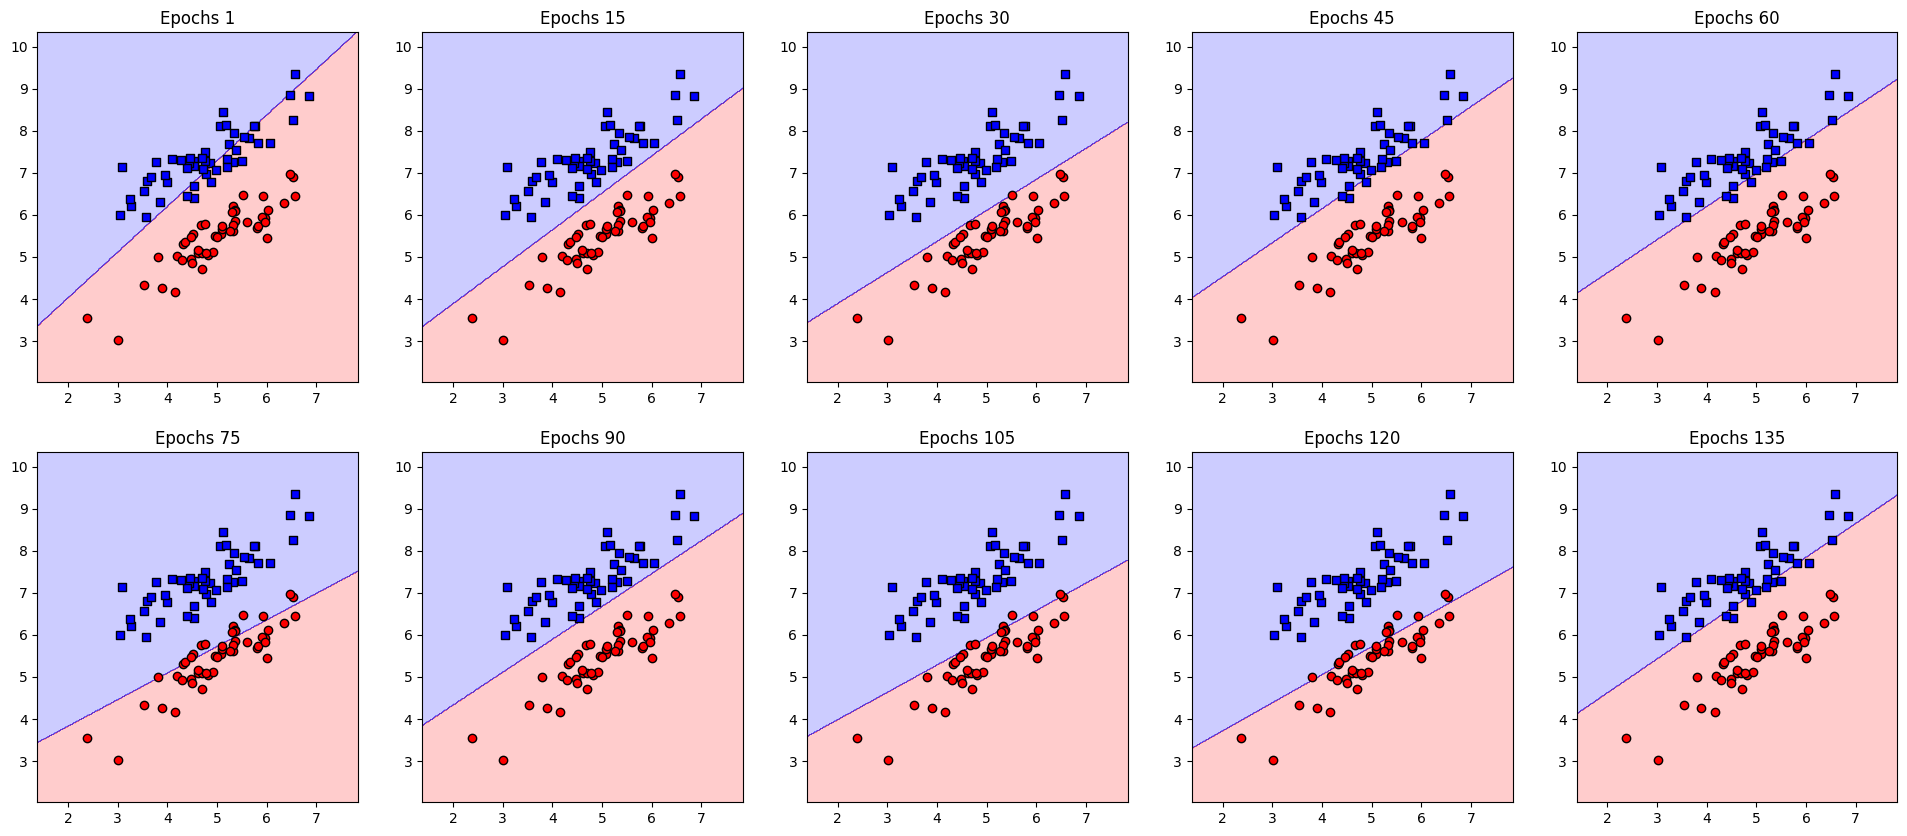

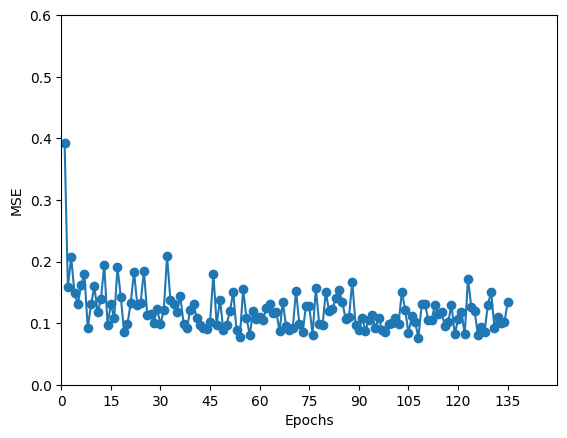

In [44]:
epochs = [1, 15, 30, 45, 60, 75, 90, 105, 120, 135]

fig , ax = plt.subplots(ncols=5, nrows=2, figsize=(24,10))
i=0
for epoch in epochs:
    adal = AdalineGD(lr=0.01, n_iter=epoch)
    adal.fit(X,y)
    plot_decision_regions(X, y, classifier=adal, ax=ax[i//5][i%5])
    ax[i//5][i%5].set_title('Epochs {}'.format(epoch))
    i+=1

plt.show()
plt.plot(range(1, len(adal.losses_) + 1), adal.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.xlim(0, 150)
plt.ylim(0, 0.6)
plt.xticks(ticks=range(0, len(adal.losses_) + 15, 15))
plt.show()

In [46]:
class AdalineSGD:
    def __init__(self, lr=0.01, n_iter=10, shuffle=True, random_state=None):
        self.lr = lr
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            loss = []
            for xi, target in zip(X, y):
                loss.append(self._update_weights(xi, target))
            avg_loss = sum(loss) / len(y)
            self.losses_.append(avg_loss)
        return self
    
    def partial_derivative_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.weight_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.bias_ = float(0.01)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.weight_ += self.lr * 2.0 * xi.dot(error) / xi.shape[0]
        self.bias_ += self.lr * 2.0 * error
        loss = (error**2).mean()
        return loss
    
    def net_input(self, X):
        return np.dot(X, self.weight_) + self.bias_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    

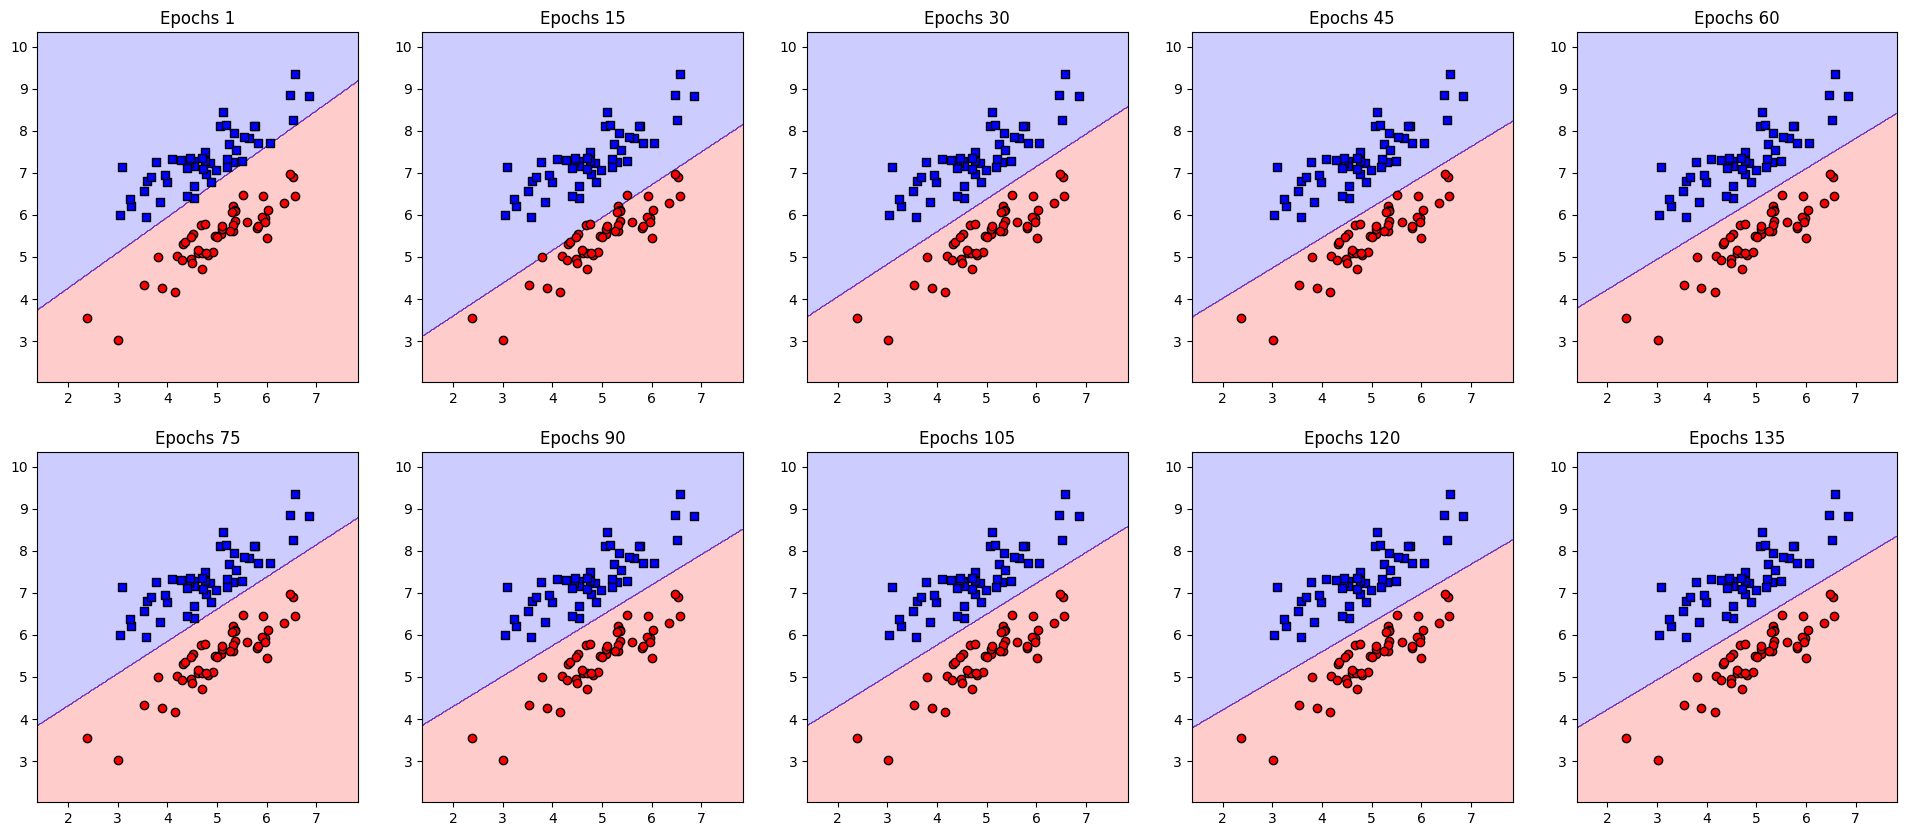

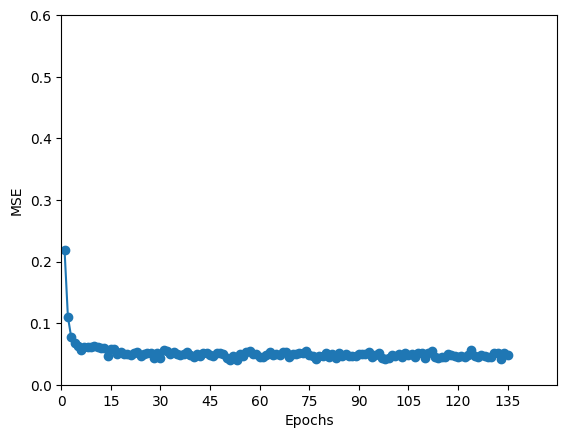

In [47]:
epochs = [1, 15, 30, 45, 60, 75, 90, 105, 120, 135]

fig , ax = plt.subplots(ncols=5, nrows=2, figsize=(24,10))
i=0
for epoch in epochs:
    adal = AdalineSGD(lr=0.01, n_iter=epoch)
    adal.fit(X,y)
    plot_decision_regions(X, y, classifier=adal, ax=ax[i//5][i%5])
    ax[i//5][i%5].set_title('Epochs {}'.format(epoch))
    i+=1

plt.show()
plt.plot(range(1, len(adal.losses_) + 1), adal.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.xlim(0, 150)
plt.ylim(0, 0.6)
plt.xticks(ticks=range(0, len(adal.losses_) + 15, 15))
plt.show()

**Summary**

Before standardisation, due to gradient descent we jump between walls of the ridge at 0.1 learning rate. We could use smaller learning rate with a cost of time. Using standardisation we can achive better accuracy with smaller learning rate and few epochs.